In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

# Análise do Dataset Simplified Coffee

Este dataset contém informações sobre diferentes cafés e suas avaliações. A seguir, apresento a descrição das colunas e algumas hipóteses que podem ser levantadas para análise.

## Descrição das Colunas

1. **Name**: Nome do café.
   - Tipo de dado: Categórico (Nominal)
   - Descrição: O nome do café, que pode ser uma marca ou uma descrição do tipo de 
     produto.

2. **Roaster**: Nome do torrefador.
   - Tipo de dado: Categórico (Nominal)
   - Descrição: Refere-se à empresa ou marca responsável pela torrefa
     ção do café.

3. **Roast**: Tipo de torra do café (Exemplo: Light, Medium, Dark).
   - Tipo de dado: Categórico (Nominal)
   - Descrição: Indica o grau de torra do café. Pode influenciar o sabor e a inte
     nsidade do café.

4. **Loc_Country**: País de localização do torrefador ou da empresa.
   - Tipo de dado: Categórico (Nominal)
   - Descrição: País onde
      o café foi torrado.

5. **Origin**: País ou região de origem dos grãos de café.
   - Tipo de dado: Categórico (Nominal)
   - Descrição: Indica o local de cultivo dos grãos de café, como Brasil,
      Colômbia, Etiópia, etc.

6. **100g_USD**: Preço do café por 100g em dólares americanos.
   - Tipo de dado: Numérico (Contínuo)
   - Descrição: O preço do café
      por 100 gramas, em dólares.

7. **Rating**: Classificação do café
   - Tipo de dado: Numérico (Contínuo)
   - Descrição: A nota média dada pelos consumidores ao café, ref
     letindo sua qualidade percebida.

8. **Review_Date**: Data da avaliação.
   - Tipo de dado: Temporal (Data)
   - Descrição: 
     A data em que a avaliação foi feita.

9. **Review**: Texto da avaliação.
   - Tipo de dado: Texto (String)
   - Descrição: Comentários
     offe` e sugerir abordagens para exploração e validação das hipóteses.


In [13]:
# importando os dados
data = pd.read_csv('../data/raw/simplified_coffee.csv')
data.head()

,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa..."
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn..."
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan..."
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,November 2017,"Delicate, richly and sweetly tart. Dried hibis..."
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,November 2017,"High-toned, floral. Dried apricot, magnolia, a..."


In [14]:
data['roast'].unique()

array(['Medium-Light', 'Medium', 'Light', 'Medium-Dark', nan, 'Dark'],
      dtype=object)

## 1. Descrição dos dados

In [15]:
data.describe()

,100g_USD,rating
count,1246.000000,1246.000000
mean,10.479125,93.306581
std,13.486674,1.479413
min,0.170000,84.000000
25%,5.260000,93.000000
50%,6.170000,93.000000
75%,9.600000,94.000000
max,132.280000,97.000000


In [16]:
data.shape

(1246, 9)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1246 non-null   object 
 1   roaster      1246 non-null   object 
 2   roast        1234 non-null   object 
 3   loc_country  1246 non-null   object 
 4   origin       1246 non-null   object 
 5   100g_USD     1246 non-null   float64
 6   rating       1246 non-null   int64  
 7   review_date  1246 non-null   object 
 8   review       1246 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 87.7+ KB


In [54]:
data.isnull().sum()

name            0
roaster         0
roast          12
loc_country     0
origin          0
100g_USD        0
rating          0
review_date     0
review          0
dtype: int64

Das duas células acima, podemos ver que o dataset possui 1246 linhas (instâncias) e 9 colunas (features). Podemos ver também que esse dataset tem dados faltantes para o atributo "roast" (torra) e no atributo "desc_3".

O atributo torra possui 12 valores faltantes,  


Conseguimos ver o preço médio dos grãos de café (USD 10,47) e que 75% dos dados possuem valor até USD 9,60 mas o café de maior valor custa USD 132,28, o que pode ser um outlier.    
Em relação às notas das avaliações temos uma amplitude de 13 pontos e a distância inter-quartil (IQR) é de apenas 1 ponto, o que pode mostrar que os cafés tem notas altas que variam pouco, por ter alta qualidade.

In [18]:
# Calculando a porcentagem de dados faltantos
dados_faltantes_roast = data['roast'].isnull().sum()
porcentagem_dados_faltantes = (dados_faltantes_roast / 2095) * 100
porcentagem_dados_faltantes

0.5727923627684964

Ou seja, temos 0.5% de dados faltantes nessa coluna. Por ser um valor baixo, podemos retirar essas linhas.

### Vamos avaliar quais tipos de torra e quais países são produtos do grão.

In [19]:
torras = data['roast'].unique()
torras

array(['Medium-Light', 'Medium', 'Light', 'Medium-Dark', nan, 'Dark'],
      dtype=object)

In [20]:
paises = data['origin'].unique()
len(paises)

27

### Análise Exploratória

De acordo com nossos objetivos, vamos tentar identificar:
* Preferência de torra,
* Se a nota influencia no preço,
* Qual país possui mais grãos bem avaliados,
* Se o local de venda do café influencia o preço.

Perguntas de Partidas e Hipóteses:


* Cafés mais caros podem ser avaliados de forma mais positiva.
* Influência do Local de Venda no Preço do Café
* A qualidade do café aumentou ao longo dos anos devido à melhoria nas práticas de cultivo
* O preço de cafés de torrefação mais escura (Dark) é mais alto em relação aos cafés de torrefação mais clara(Ligth e Medium)

Pela análise gráfica, sugere que o preço do café está fortemente ligado à sua qualidade percebida, ou seja, em geral a qualidade do café, medida pela nota, está positivamente relacionada ao seu preço. Consumidores que buscam cafés de alta qualidade estão dispostos a pagar mais por eles.

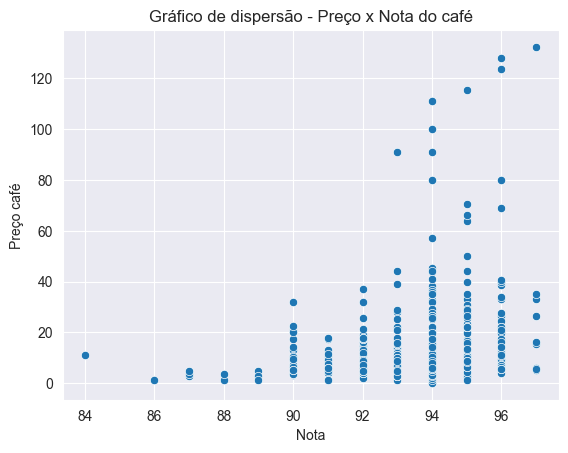

In [87]:
ax = sns.scatterplot(data=data, x='rating', y='100g_USD')
plt.title("Gráfico de dispersão - Preço x Nota do café")
ax.set_xlabel('Nota')
ax.set_ylabel('Preço café')
plt.show()

In [22]:
medium_light = (data['roast'] == "Medium-Light").sum()
others =  (data['roast']).count()
percentage_medium_light = (medium_light / others) * 100
percentage_medium_light

73.257698541329

Esse gráfico já pode sugerir que o preço pode estar relacionado com o local da venda, uma vez que os grãos mais caros estão em países mais desenvolvidos e não produtores de café (Taiwan, Estados Unidos, Inglaterra)

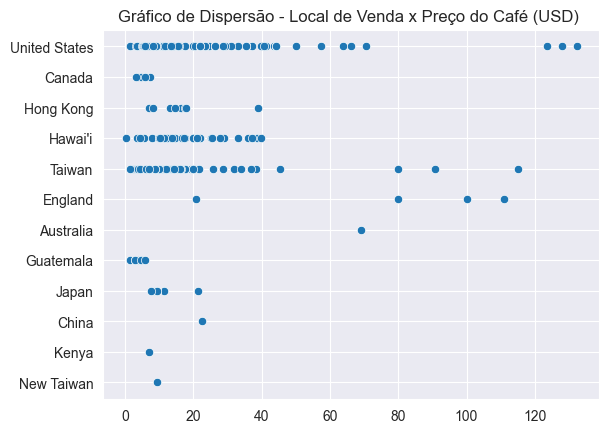

In [23]:
ax = sns.scatterplot(data=data, y='loc_country', x='100g_USD')
plt.title("Gráfico de Dispersão - Local de Venda x Preço do Café (USD) ")
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

In [63]:
#Extraindo o ano para entender as tendências de aumento e decrescimento anual
data['ano'] = pd.to_datetime(data['review_date'], format= '%B %Y').dt.year

O gráfico a seguir, sugere que o valor "100g_USD" apresentou uma tendência de alta nos primeiros anos do período analiado, possivelmente devido a fatores como inflação, aumento da demanda ou outras variáveis que influenciam esse valor. No entanto, a partir de 2021, houve uma reversão dessa tendência, com uma queda acentuada no valor médio

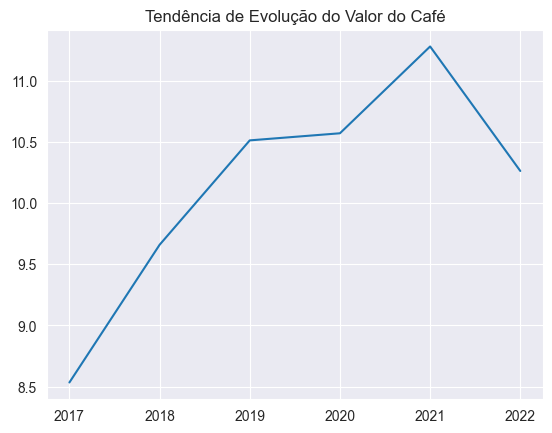

In [68]:
# calcular a média de '100g_USD' por ano
media_por_ano = data.groupby('ano')['100g_USD'].mean()
plt.plot(media_por_ano.index, media_por_ano.values)
plt.title('Tendência de Evolução do Valor do Café')
plt.show()

Ambos os gráficos apresentam um ponto de inflexão em 2019, onde a taxa de crescimento da nota do café aumenta significativamente. Isso pode indicar a implementação de novas práticas agrícolas, investimentos em tecnologia ou outros fatores que contribuíram para a melhoria da qualidade do café a partir desse ano.

É evidente que o valor médio das notas tem apresentado um crescimento contínuo desde 2020. Esse aumento pode ser atribuído, em parte, à queda nos preços do café, o que tem tornado o produto mais acessível. Com preços mais baixos, os consumidores têm a oportunidade de adquirir cafés de melhor qualidade, o que, por sua vez, eleva o valor das notas. Essa dinâmica reflete uma relação positiva entre a acessibilidade ao café de qualidade e a valorização das notas.

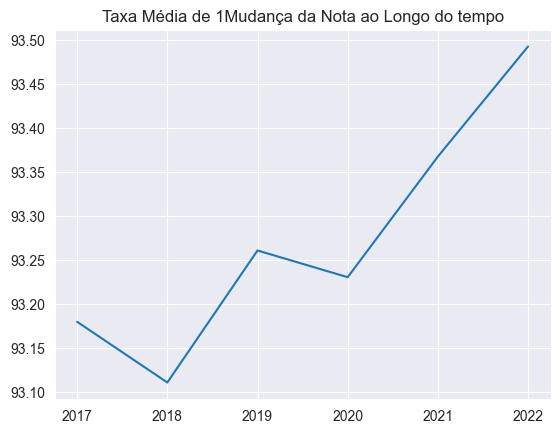

In [84]:
media_por_ano = data.groupby('ano')['rating'].mean()
plt.plot(media_por_ano.index, media_por_ano.values)
plt.title('Taxa Média de 1Mudança da Nota ao Longo do tempo')
plt.show()

 Agora, vamos ver quantos países produtores distintos a base possui e em quantos países esses vendedores estão localizados. Depois vamos repetir as análises para os cafés mais caros.

In [28]:
paises_produtores = data['origin'].nunique()
paises_vendedores = data['loc_country'].nunique()

print(f"Existem {paises_produtores} países produtores")
print(f"Existem {paises_vendedores} países que vendem esses cafés")

# Listar os países produtores e vendedores de café
print("\nPaíses produtores:", data['origin'].unique())
print("\nPaíses vendedores:", data['loc_country'].unique())

Existem 27 países produtores
Existem 12 países que vendem esses cafés

Países produtores: ['Ethiopia' "Hawai'I" 'Kenya' 'Guatemala' 'Colombia' 'Panama' 'Nicaragua'
 'Indonesia' 'Peru' 'Rwanda' 'Nepal' 'Costa Rica' 'Ecuador' 'Brazil'
 'Democratic Republic Of The Congo' 'Burundi' 'El Salvador' 'Yemen'
 'Bolivia' 'Taiwan' 'Mexico' 'Dominican Republic' 'Honduras' 'Thailand'
 'Uganda' 'Tanzania' 'Philippines']

Países vendedores: ['United States' 'Canada' 'Hong Kong' "Hawai'i" 'Taiwan' 'England'
 'Australia' 'Guatemala' 'Japan' 'China' 'Kenya' 'New Taiwan']


O gráfico apresenta os cinco principais países produtores de café, classificados pela nota média de seus grãos. A Tanzânia lidera o ranking, seguida de perto pelo Panamá e Equador. Quênia e Iêmen completam a lista dos cinco primeiros. A alta classificação desses países indica uma qualidade excepcional em seus cafés, resultado de fatores como clima, variedade de grãos e processos de produção

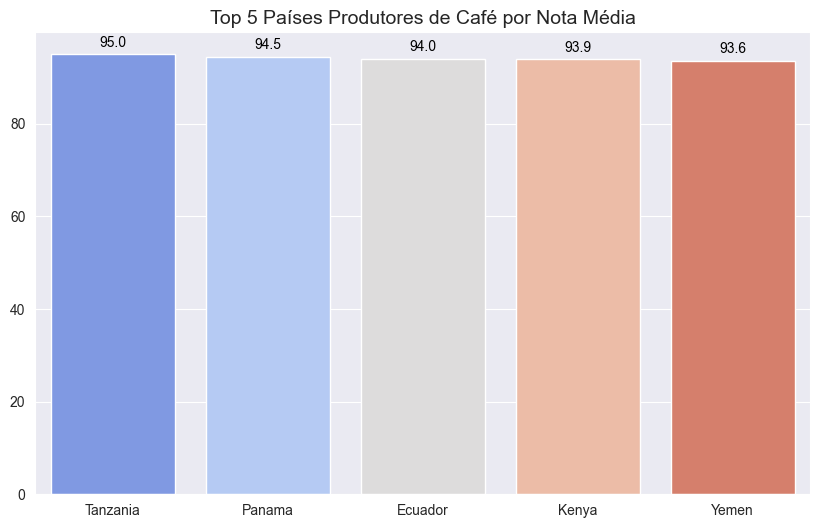

In [51]:
media_notas = data.groupby('origin')['rating'].mean()
top_5_paises = media_notas.nlargest(5)

plt.figure(figsize = (10, 6))

ax = sns.barplot(x = top_5_paises.index, y = top_5_paises.values, palette = "coolwarm")

# Adicionando os valores das médias nas barras
for i, valor in enumerate(top_5_paises.values):
    ax.text(i, valor + 1, f"{valor:.1f}", ha = "center", va= "bottom", fontsize = 10, color = "black")

plt.title("Top 5 Países Produtores de Café por Nota Média", fontsize = 14)
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation = 360)
plt.show()

o gráfico nos oferece uma visão inicial da complexa relação entre preço, nota e tipo de torra do café. Ao compreender essa relação, podemos tomar decisões mais informadas na hora de escolher e consumir café, além de contribuir para o desenvolvimento de um mercado de café mais transparente e justo.

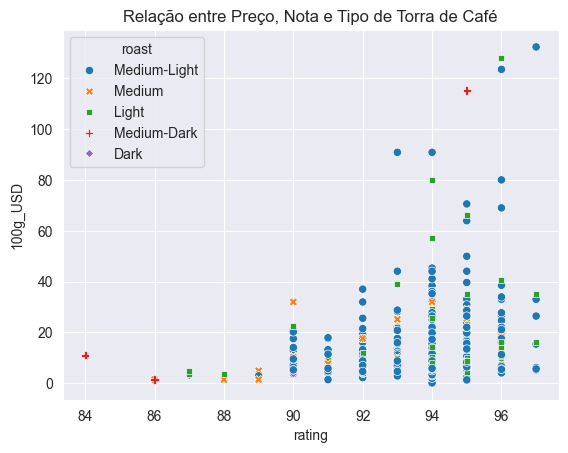

In [99]:
ax = sns.scatterplot(data=data, x='rating', y='100g_USD', hue = 'roast', style= 'roast')
plt.title("Relação entre Preço, Nota e Tipo de Torra de Café")
ax.set_xlabel('rating')
ax.set_ylabel('100g_USD')
plt.show()

In [98]:
data[data['roast'] == 'Dark']

,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review,ano
341,Indonesia Sumatra Gayo Espresso,Simon Hsieh's Aroma Roast Coffees,Dark,Taiwan,Indonesia,8.50,94,October 2019,Evaluated as espresso. Very rich and deeply sw...,2019
395,Sumatra Dark,Starbucks Coffee,Dark,United States,Indonesia,3.08,87,February 2020,"Roast-dominant, smoky-sweet. Dark chocolate, b...",2020
1054,Sumatra Dark,Starbucks Coffee,Dark,United States,Indonesia,3.82,90,April 2022,"Earthy, bittersweet. Fresh-cut oak, cocoa powd...",2022


## 3. Insights

Existe uma possibilidade de associação entre preços mais altos e avaliações mais positivas, indicando que cafés mais caros podem ser considerados de maior qualidade.

O local de venda ou torrefação pode impactar o preço, refletindo custos e preferências regionais.

A qualidade dos cafés parece ter melhorado ao longo dos anos, possivelmente devido ao aprimoramento das práticas de cultivo e torrefação.

Embora seja difícil analisar o impacto da torra escura no preço devido à amostra limitada, as torras média e clara dominam o mercado, permitindo insights mais consistentes nesses tipos de torra.